In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
from sklearn.model_selection import train_test_split


In [7]:
df=pd.read_csv('datasets/iris.csv',index_col='Id')

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


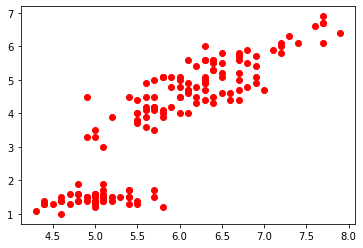

In [30]:
plt.figure()
x=df['SepalLengthCm']

y=df['PetalLengthCm']
plt.scatter(x,y,c='red')
plt.show()

In [31]:
X=df.loc[:,['PetalLengthCm','PetalWidthCm']]

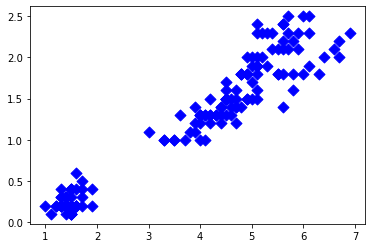

In [32]:
plt.scatter(X.PetalLengthCm,X.PetalWidthCm,c='blue',marker='D',s=60)
plt.show()

In [33]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [34]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 2, 3, 2, 3, 3, 2, 0, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 3, 2, 0, 3, 2, 0, 0, 3, 3, 2, 2,
       3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3])

In [35]:
model.cluster_centers_

array([[4.64857143, 1.5       ],
       [1.464     , 0.244     ],
       [6.28461538, 2.13846154],
       [5.39666667, 2.05333333],
       [3.83181818, 1.16818182]])

In [36]:
cluster_colors = np.array(['red', 'blue', 'green', 'pink', 'yellow'])

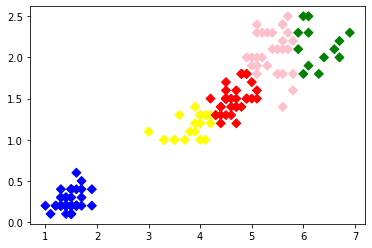

In [38]:
plt.scatter(X.PetalLengthCm,X.PetalWidthCm,marker='D',s=40,color=cluster_colors[model.labels_])
plt.show()

In [59]:
from scipy.spatial.distance import cdist
error = []

for k in range(1,20):
    model = KMeans(n_clusters=k)
    model.fit(X)
    # distance between points and cluster centres 
    dist = cdist(X, model.cluster_centers_)
    # only keep the distances between a point and its own cluster
    act_dist = np.min (dist, axis=1)
    # add all the distances
    total_distance_error = sum(act_dist)
    error.append(total_distance_error)
error

C:\Users\SA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[256.0398605319133,
 87.65887594972752,
 55.388565479609625,
 45.2313110760368,
 39.836118964113865,
 35.21248721042506,
 31.953137453296694,
 29.365888416670373,
 27.7447871556845,
 25.86144771767357,
 24.840101747718993,
 23.602493426367126,
 22.621963450143355,
 21.437229649846085,
 20.97707634492835,
 19.762224969769,
 18.863314370548938,
 18.16329950253692,
 18.662183693328394]

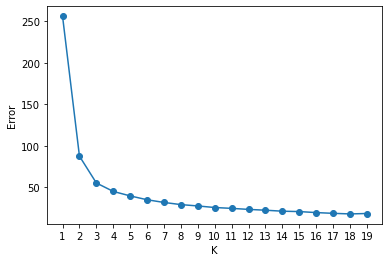

In [60]:
plt.plot(range(1,20), error,'-o')
plt.xticks(range(1,20))
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [61]:
model.inertia_

2.8678470418470416

In [62]:
k = range(1, 20)

In [63]:
error = []

for k in range(1,20):
    model = KMeans(n_clusters=k)
    model.fit(X)
   
    error.append(model.inertia_)
error

C:\Users\SA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.49352336396547,
 13.93330875790876,
 11.052733877751736,
 9.205027140974968,
 7.640593062579725,
 6.472894541406304,
 5.730425630067575,
 5.124253867047985,
 4.700009306313655,
 4.41245381858285,
 3.9478067768170044,
 3.7235980226082512,
 3.356127950006981,
 3.177273554402586,
 2.989744949494947,
 2.784546536796537]

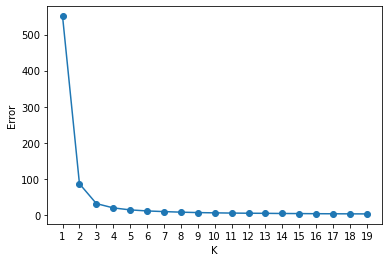

In [64]:
plt.plot(range(1,20), error,'-o')
plt.xticks(range(1,20))
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [65]:
X

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0


# make pipeline 

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)

In [68]:
pipeline=make_pipeline(scaler,kmeans)

In [69]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [70]:
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [71]:
labels=pipeline.predict(X)

In [72]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# hierarchy

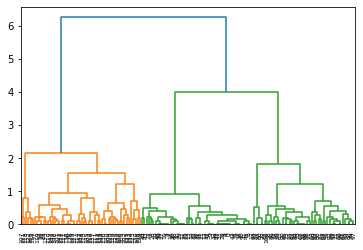

In [79]:
from scipy.cluster.hierarchy import linkage,dendrogram
merging=linkage(X,method='complete')
dendrogram(merging,
           
          leaf_rotation=90,
          leaf_font_size=6)
plt.show()

# pca

In [80]:
data=pd.read_csv('datasets/breast_cancer.csv')

In [81]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [82]:

x=data.iloc[:,:-1]
y=data.outcome

In [83]:
x.shape

(569, 30)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [87]:
x_train.shape

(398, 30)

# we don't want to deal with 30 predictor so,we will do dimension reduction through pca

In [85]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train)

PCA()

In [86]:
pca.explained_variance_

array([4.50158475e+05, 7.57801119e+03, 8.76411854e+02, 5.75220287e+01,
       3.72167805e+01, 2.78935237e+00, 1.84484891e+00, 3.77521722e-01,
       1.70288083e-01, 7.08317371e-02, 2.90398665e-02, 6.40667563e-03,
       3.13741545e-03, 2.02934331e-03, 1.30714664e-03, 6.02474266e-04,
       3.87163424e-04, 2.19701600e-04, 1.81817168e-04, 1.47220397e-04,
       7.71395949e-05, 5.78859747e-05, 3.49709202e-05, 2.49971107e-05,
       1.46681353e-05, 1.21974269e-05, 3.28589116e-06, 2.89733739e-06,
       1.97240239e-06, 5.95905811e-07])

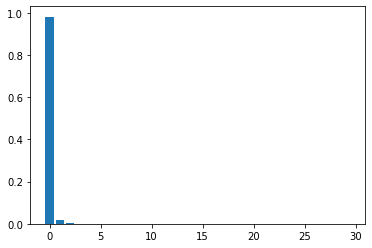

In [92]:
plt.bar(range(30),pca.explained_variance_ratio_)
plt.show()

In [98]:
sum(pca.explained_variance_ratio_[:3])

0.9997819216896479

In [99]:
x_train_select=pd.DataFrame(pca.fit_transform(x_train)).iloc[:,:3]

In [105]:
x_test_select=pd.DataFrame(pca.fit_transform(x_test)).iloc[:,:3]

In [106]:
x_train_select.shape

(398, 3)

In [107]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train_select,y_train)

RandomForestClassifier()

In [108]:
predict=model.predict(x_test_select)

In [109]:
accuracy_score(y_test,predict)

0.8362573099415205

In [111]:
r2_score(y_test,predict)

0.29629629629629617

In [115]:
print(pca.components_)


[[ 5.12672255e-03  2.67843774e-03  3.56355384e-02  5.00375176e-01
   5.70428069e-06  5.23343976e-05  9.32133110e-05  5.28196335e-05
   6.66835241e-06 -1.42076826e-06  2.92955004e-04 -1.25014185e-04
   2.18410798e-03  4.97904072e-02 -1.04184300e-06  8.58009486e-06
   1.10088253e-05  4.06770284e-06 -2.39207726e-06  1.68818127e-07
   7.42972686e-03  3.68621796e-03  5.23418640e-02  8.61991203e-01
   8.55492729e-06  1.42667401e-04  2.03344248e-04  8.49965239e-05
   1.79727588e-05  5.30251807e-06]
 [-1.06593040e-02 -1.15565655e-04 -7.34193079e-02 -8.60637648e-01
   2.40317122e-06 -5.05108202e-05 -1.27728590e-04 -8.57146107e-05
   3.44884107e-05  1.32205724e-05  3.08416701e-04 -1.77253248e-04
   1.00533202e-03  5.42780637e-02  1.18906145e-06 -2.33938909e-05
  -2.56905319e-05 -1.60234735e-05 -1.84019563e-06 -1.10097088e-06
  -1.74400888e-03  1.06587935e-02 -1.58601189e-02  5.00483054e-01
   5.81495272e-05  1.06091208e-04  1.35900716e-05 -5.54495279e-05
   1.83424461e-04  4.72762625e-05]
 [-1.1